In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from collections import Counter
%matplotlib inline

In [2]:
data = pd.read_excel("spambasePCAKNNpracticedataset-1569661171585.xlsx", sheet_name = 2)

In [3]:
spam = data
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,SpamYorN
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


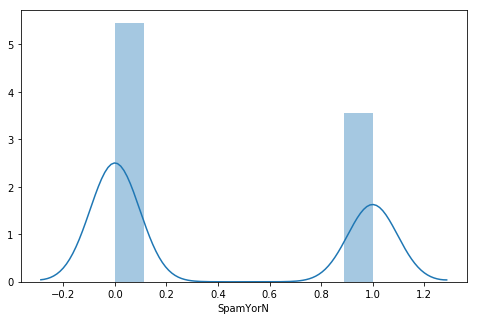

In [5]:
plt.figure(figsize=(8,5))
sns.distplot(spam['SpamYorN'])

In [6]:
print(spam.isnull().sum().any())

False


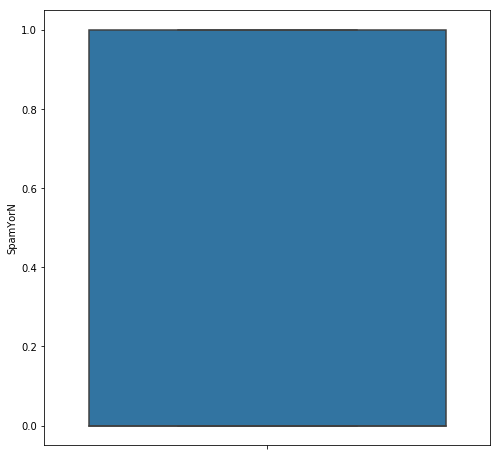

In [7]:
plt.figure(figsize=(8,8))
sns.boxplot(spam['SpamYorN'], orient='v')

In [8]:
drop_cols=[]
for cols in spam.columns:
    if spam[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
spam.drop(drop_cols,axis=1, inplace = True)

Number of constant columns to be dropped:  0
[]


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(spam)
spam_sc = sc.transform(spam)


C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [10]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,SpamYorN
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [11]:
X = spam.loc[:,spam.columns != 'SpamYorN']
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [12]:
y = spam.loc[:,spam.columns == 'SpamYorN']
y.head()

,SpamYorN
0,1
1,1
2,1
3,1
4,1


In [13]:
y.groupby('SpamYorN').size()

SpamYorN
0    2788
1    1813
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3680, 57)
(3680, 1)
(921, 57)
(921, 1)


In [19]:
import time
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(random_state =0)
start_time = time.time()
rfc.fit(X_train,y_train)
end_time = time.time()
time1 = end_time-start_time
print(time1)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.977506160736084


In [20]:
predictions = rfc.predict(X_test)

In [21]:
from sklearn import metrics
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 0.2134014379619144


In [22]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X)

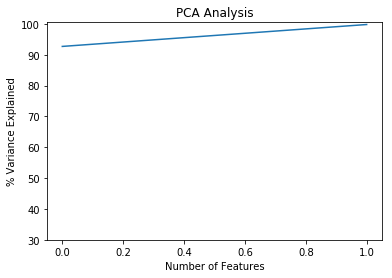

In [23]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [24]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

2 components explain 95% of the variation in data


In [25]:
pca = PCA(n_components=2, random_state = 0)
pca.fit(X)
X_2 = pca.transform(X)
print(X_2.shape)

(4601, 2)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.25, random_state=1)

In [27]:
print(X_train.shape)
print(X_test.shape)

(3450, 2)
(1151, 2)


In [28]:
import time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

0.10816097259521484


C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [29]:
predictions_pca = rf.predict(X_test)

In [30]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions_pca))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for test set is 0.4261872057183138


In [36]:
% time
pca = PCA(n_components=100, random_state = 0)
pca.fit(X)
X_100 = pca.transform(X)
print(X_250.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_100, y, test_size=0.25, random_state=1)

import time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
start_time = time.time()
rf.fit(X_train, y_train)
end_time = time.time()
time2 = end_time-start_time
print(time2)

predictions_pca = rf.predict(X_test)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions_pca))
print('RMSE for test set is {}'.format(RMSE_test))

predictions_pca_exp = np.expm1(predictions_pca)


UsageError: Line magic function `%` not found.


In [37]:
difference = time2/time1
print(difference)

0.11064991397472852
